# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('Train R^2', linreg.score(predictor_train, response_train))
    print('Test R^2', linreg.score(predictor_test, response_test))

    response_train_pred = linreg.predict(predictor_train)
    response_test_pred = linreg.predict(predictor_test)
    
    # Plot the Linear Regression line
    f, axes = plt.subplots(1, 2, figsize=(16, 8))
    axes[0].scatter(response_train, response_train_pred)
    axes[0].plot(response_train, response_train, 'w-', linewidth = 1)
    axes[0].set_xlabel(predictor.columns[0])
    axes[0].set_ylabel(response.columns[0])
    axes[1].scatter(response_test, response_test_pred)
    axes[1].plot(response_train, response_train, 'w-', linewidth = 1)
    axes[1].set_xlabel(predictor.columns[0])
    axes[1].set_ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def generatePredictVsTruePlot(response, response_pred, title):
    plt.figure(figsize=(8, 4))
    plt.title(title)
    plt.scatter(response, response_pred)
    plt.plot(response, response, 'w-', linewidth = 1)
    plt.xlabel("True values of the Response Variable (Train)")
    plt.ylabel("Predicted values of the Response Variable (Train)")
    plt.show()
    
def generateRandomForestClassifier(data, predictor, response, n_estimators, depth):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Classifier object
    random_forest = RandomForestClassifier(n_estimators = n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    # Print the Train and Test Classification Accuracy
    print("Train Classification Accuracy \t:", random_forest.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", random_forest.score(predictor_test, response_test))

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}

def generateRandomForestRegressor(data, predictor, response, n_estimators, random_state):
    print(f'{predictor} vs. {response}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Regressor object
    random_forest = RandomForestRegressor(n_estimators = n_estimators, random_state = random_state)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train.values.ravel())

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)
    
    # Print the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_train, response_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_train, response_train_pred))
    print()

    # Print the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", random_forest.score(predictor_test, response_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(response_test, response_test_pred))
    print()

    return {"response_train": response_train, "response_train_pred": response_train_pred, "response_test": response_test, "response_test_pred": response_test_pred}
   

/var/folders/y1/6s6fsy6x44qdcc10mwlwldt80000gn/T/ipykernel_31255/570912297.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.42344742]
Coefficients 	: a =  [[0.20009016]]
Train R^2 0.004172996828396558
Test R^2 0.003920231796280649


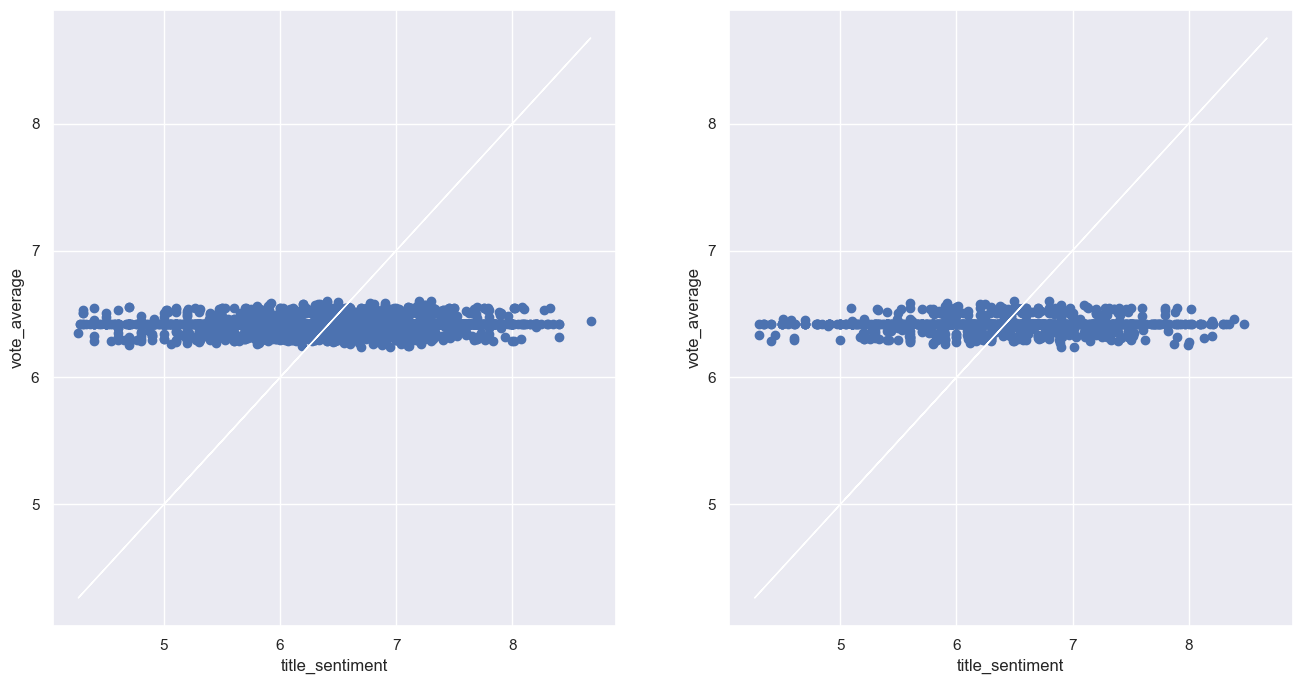

Intercept 	: b =  [6.42871819]
Coefficients 	: a =  [[0.12396606]]
Train R^2 0.010660338253256185
Test R^2 0.006666592009487271


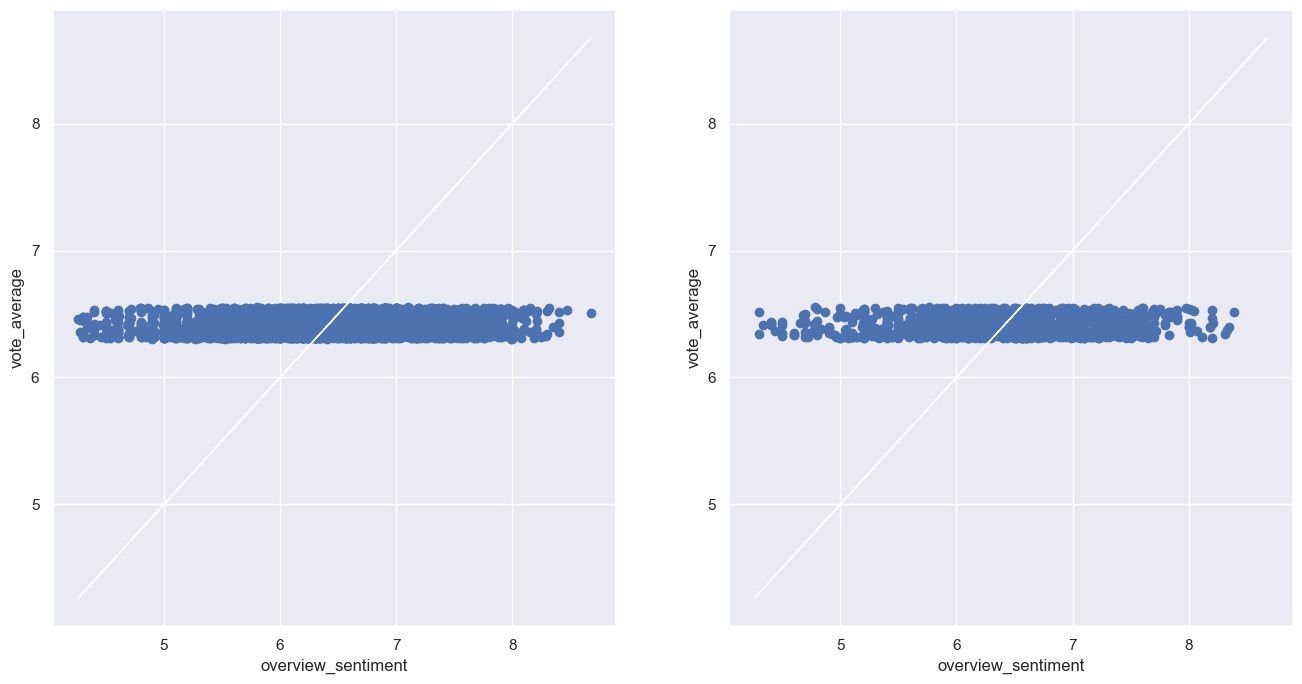

Intercept 	: b =  [6.32258516]
Coefficients 	: a =  [[0.00575541]]
Train R^2 0.005462114067500967
Test R^2 0.005091314964671412


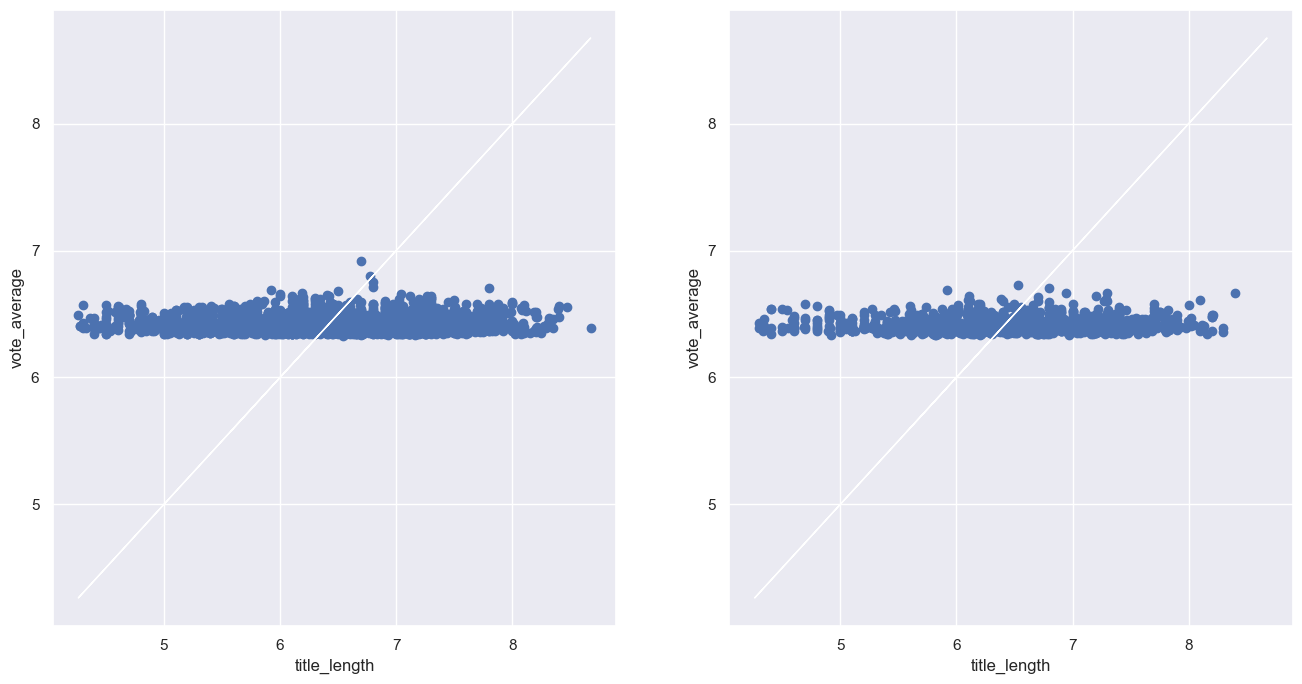

Intercept 	: b =  [6.33113658]
Coefficients 	: a =  [[0.03237605]]
Train R^2 0.005549864607903743
Test R^2 0.0008109481378174577


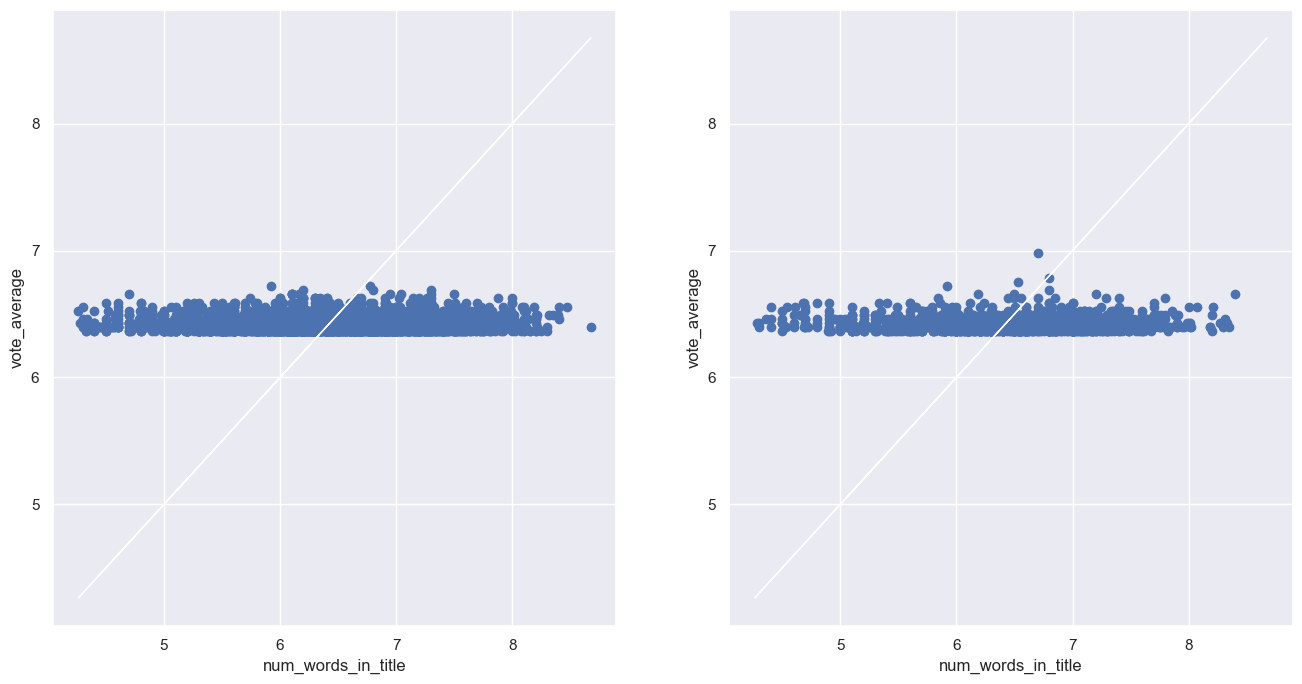

Intercept 	: b =  [6.44519112]
Coefficients 	: a =  [[-0.00518143]]
Train R^2 0.0001608891074164065
Test R^2 -0.0002590304046847791


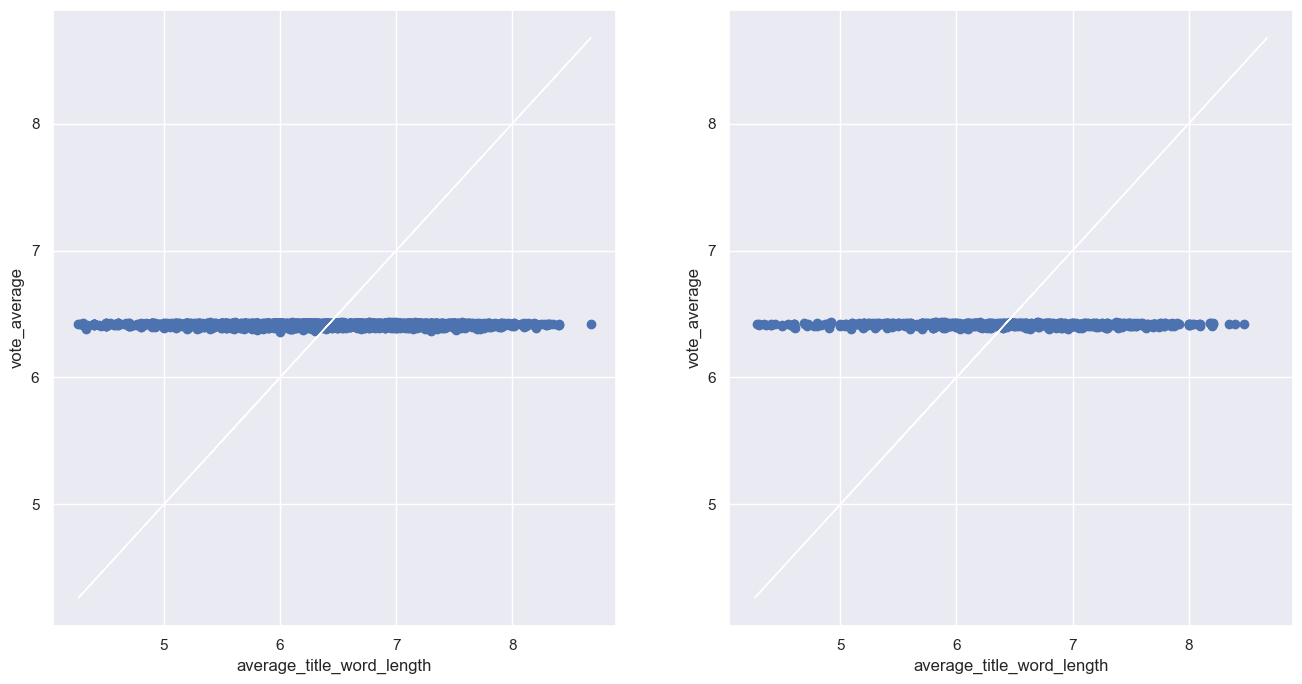

Intercept 	: b =  [6.40694311]
Coefficients 	: a =  [[0.05779245]]
Train R^2 0.001075320450935724
Test R^2 0.004584235145569493


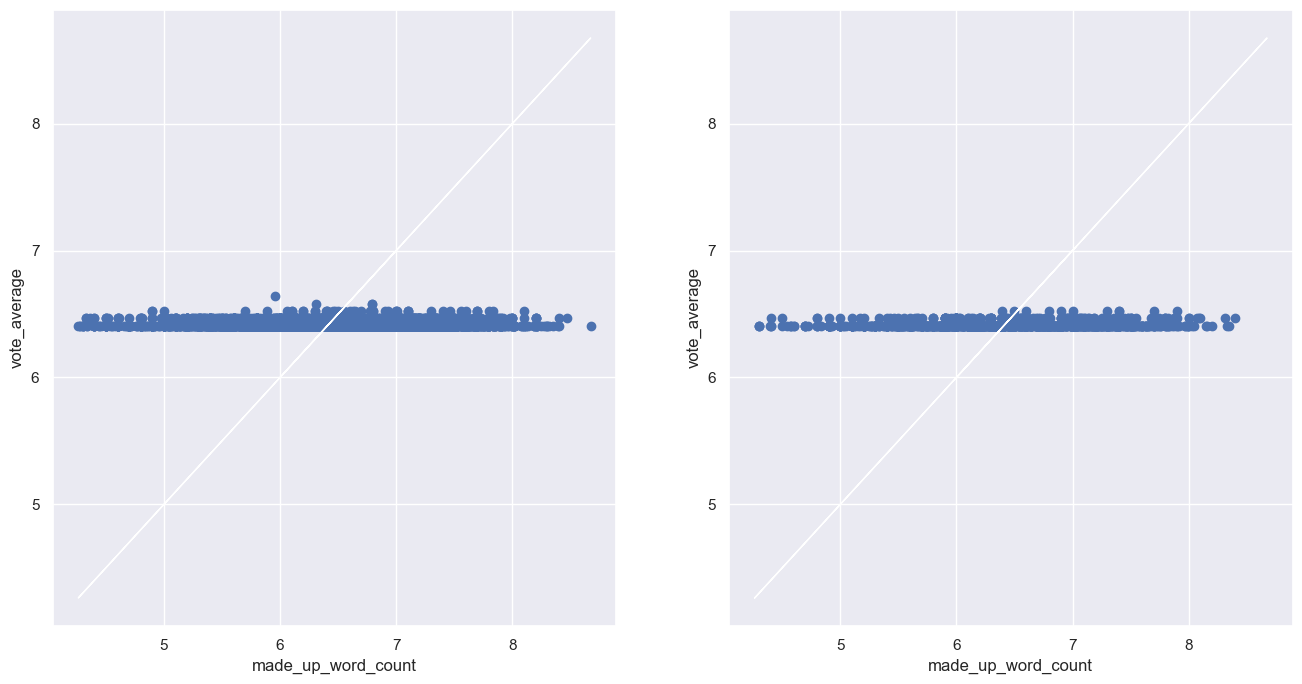

In [2]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Multi-Variate Predictor vs. Vote Average

Intercept 	: b =  [6.43930194]
Coefficients 	: a =  [[ 0.15765345  0.09793415  0.00929482 -0.02955879 -0.01334411  0.05019993]]
Train R^2 0.017056573663344343
Test R^2 0.01644842883305664


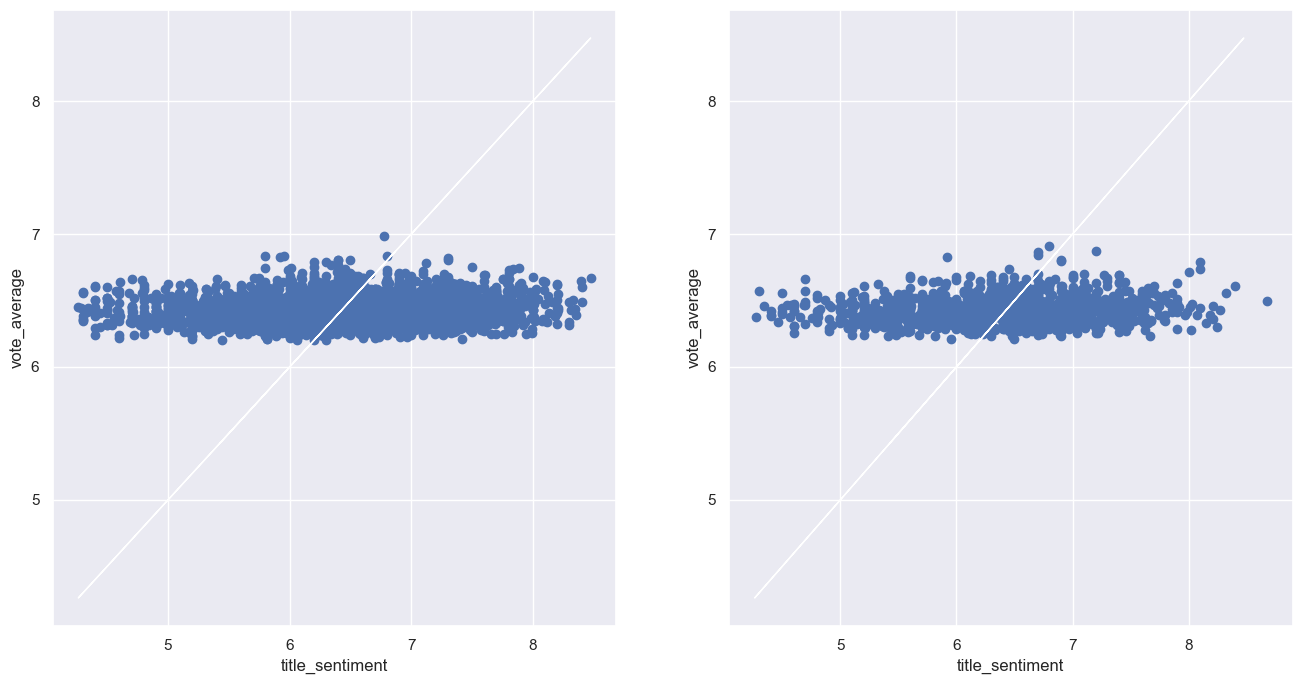

In [3]:
multi_variate_linreg = performLinearRegression(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [21.00024224]
Coefficients 	: a =  [[-0.07541397]]
Train R^2 1.0484227573215321e-05
Test R^2 3.652018055999573e-05


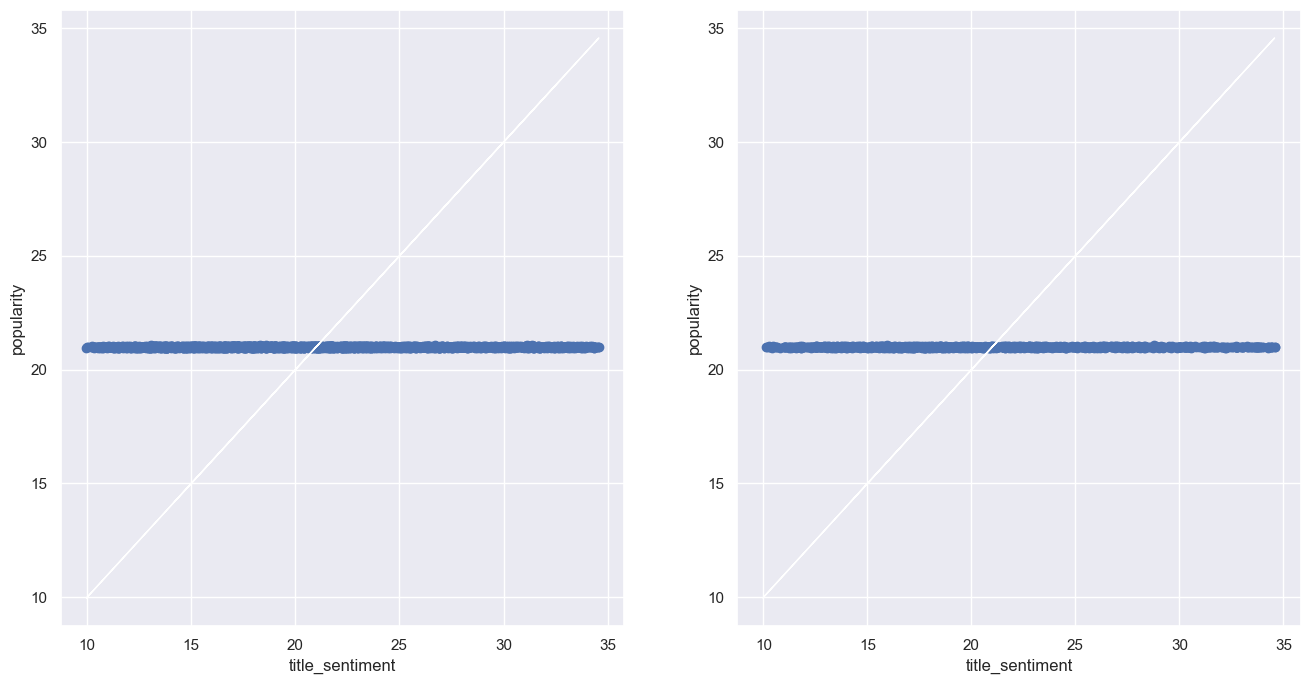

Intercept 	: b =  [20.98988956]
Coefficients 	: a =  [[-0.27836306]]
Train R^2 0.0009103675930630661
Test R^2 -0.0014970572358015133


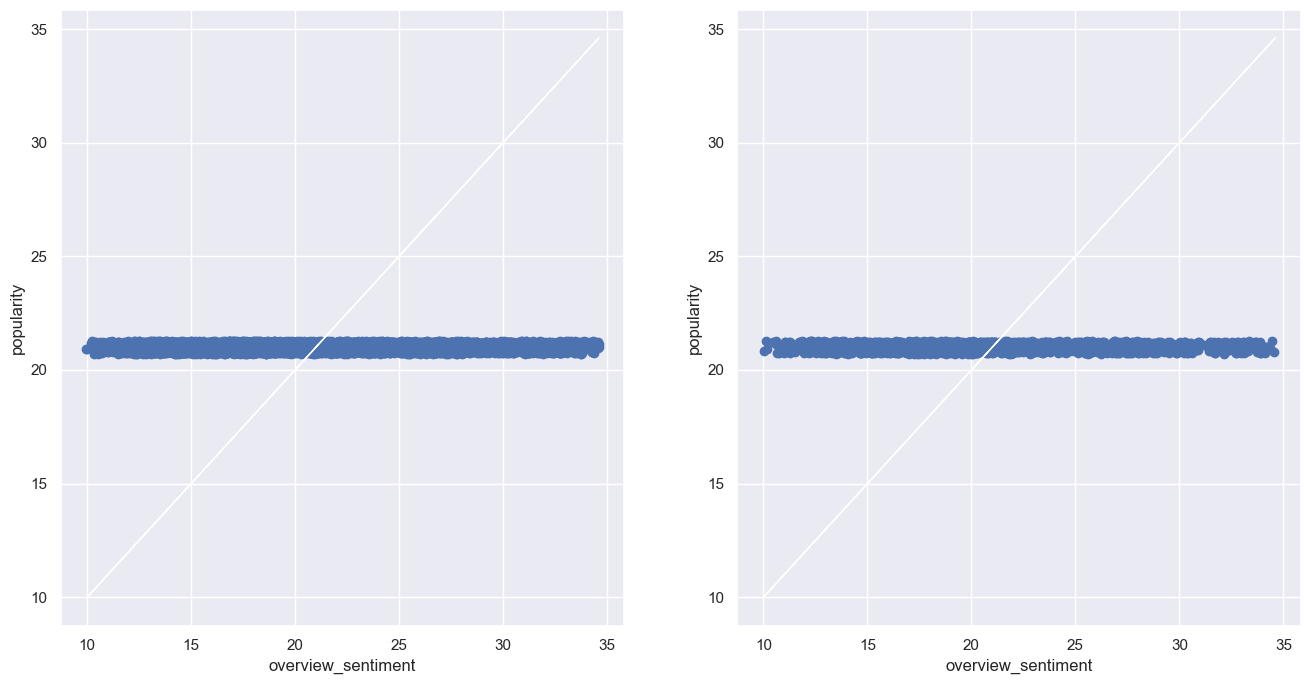

Intercept 	: b =  [21.17677194]
Coefficients 	: a =  [[-0.0114706]]
Train R^2 0.00035445596133887314
Test R^2 -0.0011181716075805426


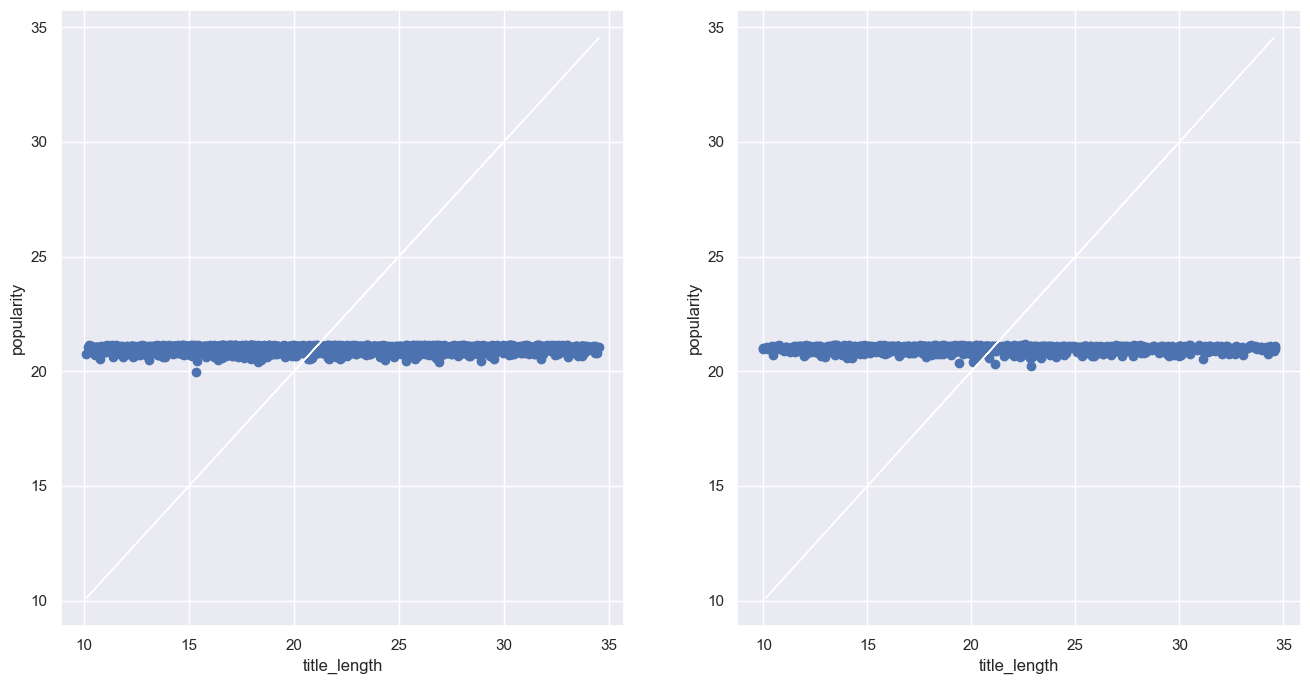

Intercept 	: b =  [21.08240022]
Coefficients 	: a =  [[-0.00355102]]
Train R^2 1.1912751253229104e-06
Test R^2 -0.00340208851734225


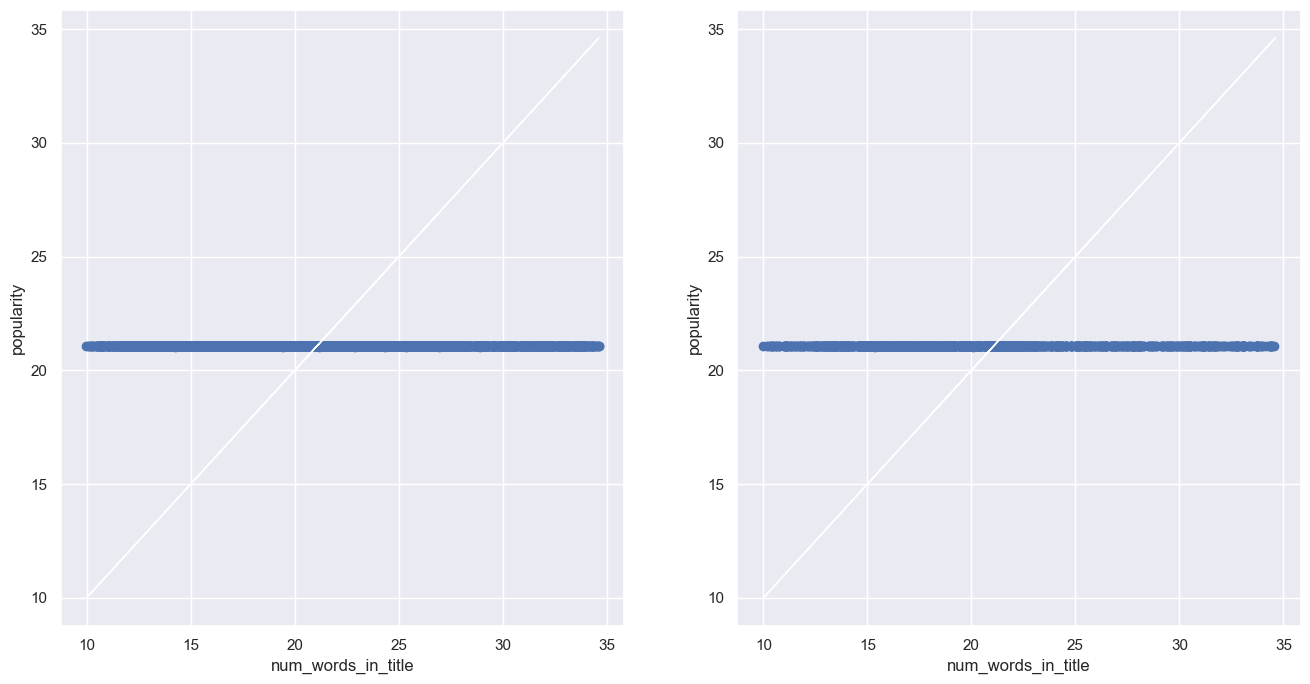

Intercept 	: b =  [20.84620793]
Coefficients 	: a =  [[0.0277515]]
Train R^2 7.545086468274675e-05
Test R^2 0.000669526724012548


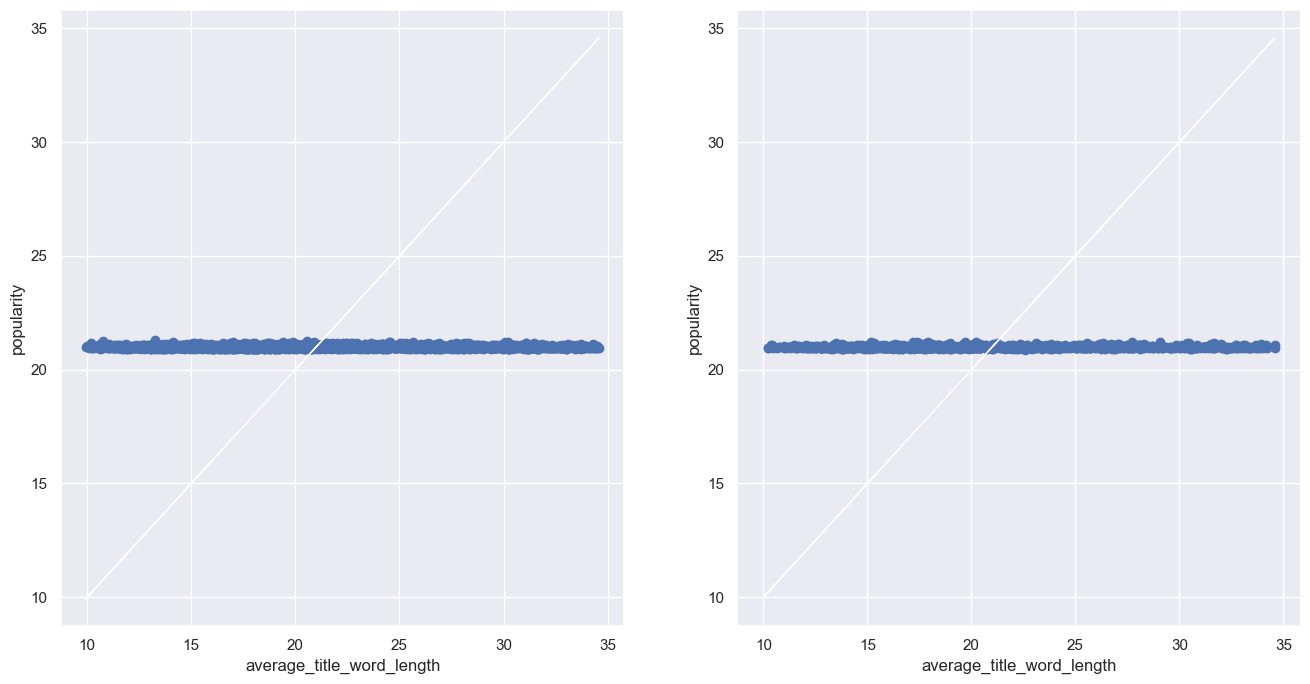

Intercept 	: b =  [20.9134381]
Coefficients 	: a =  [[0.30321613]]
Train R^2 0.0004600203863540653
Test R^2 -0.0012635627895880575


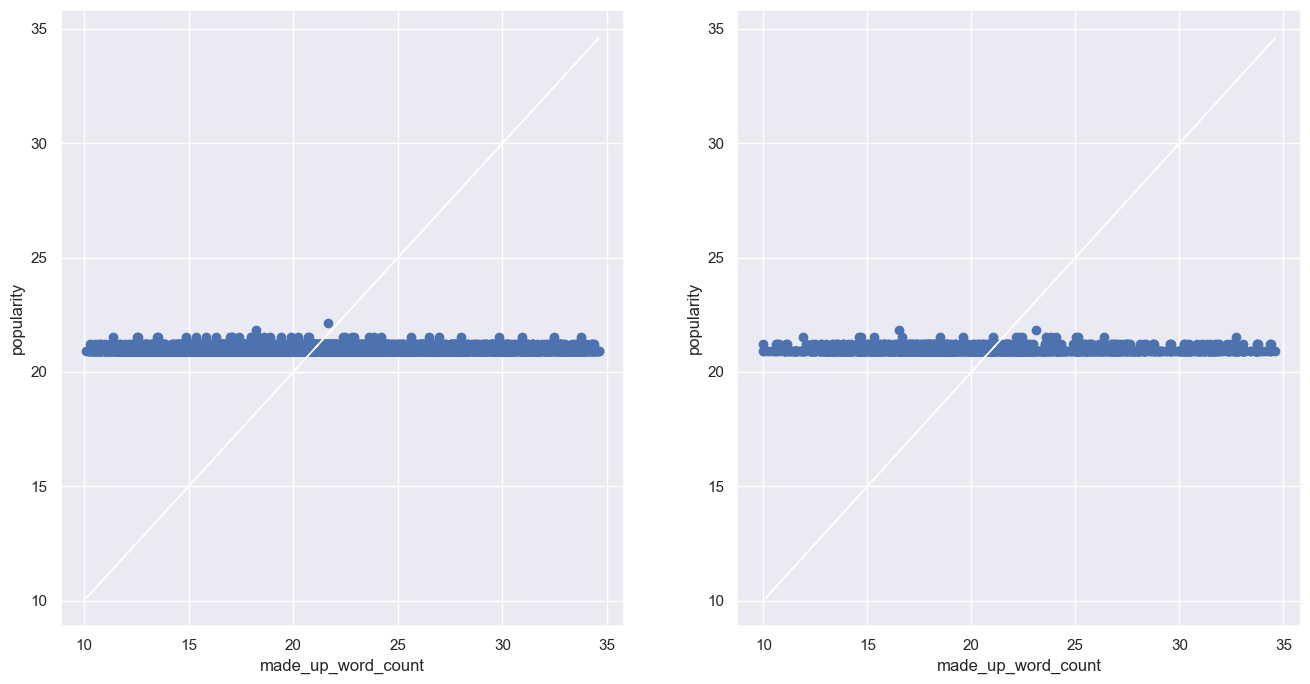

In [4]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

## Multi-Variate Predictor vs. Popularity

Intercept 	: b =  [19.88545425]
Coefficients 	: a =  [[-0.05836436 -0.31105646 -0.08964611  0.48765513  0.19705927  0.18353322]]
Train R^2 0.002774956738454848
Test R^2 -0.004857743658659652


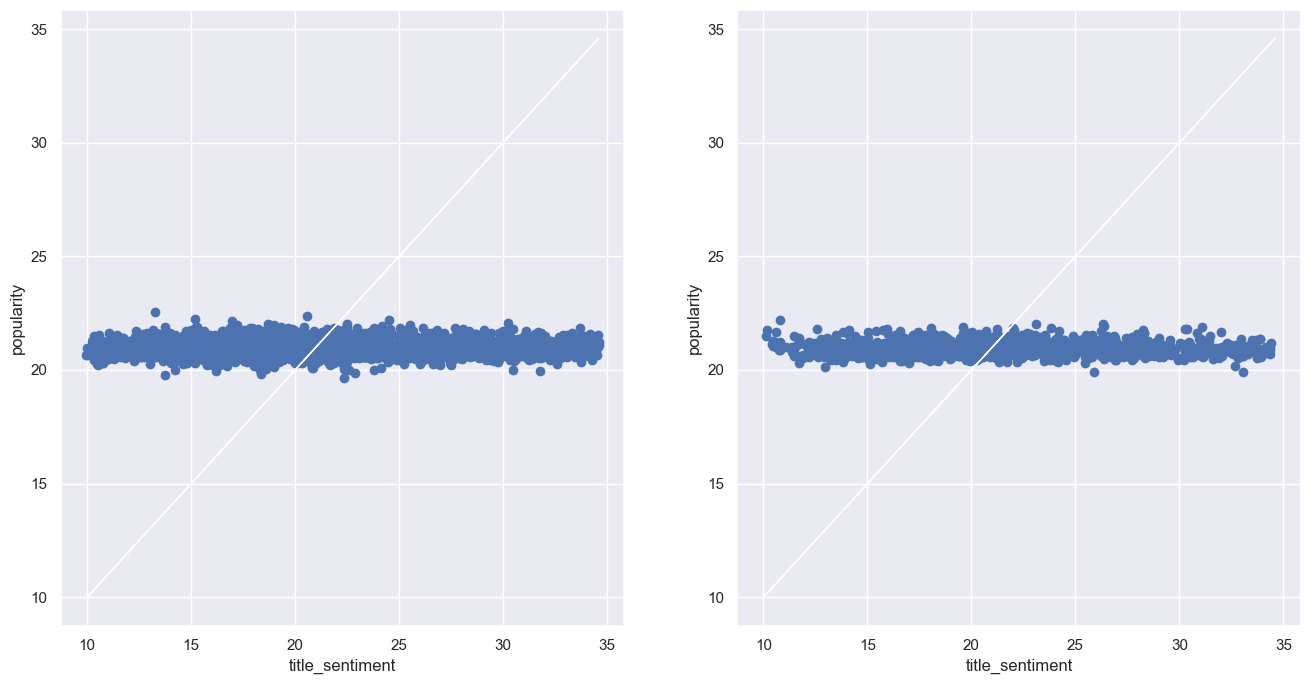

In [5]:
multi_variate_linreg = performLinearRegression(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], 'popularity')

# Random Forest Regressor

## Predictor vs. Vote Average

title_sentiment vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.047466304996060305
Mean Squared Error (MSE) 	: 0.5388493187194834

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.023245562938464026
Mean Squared Error (MSE) 	: 0.5869410938623303



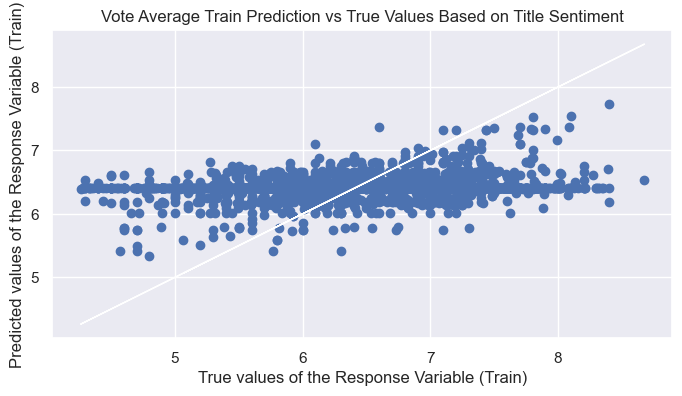

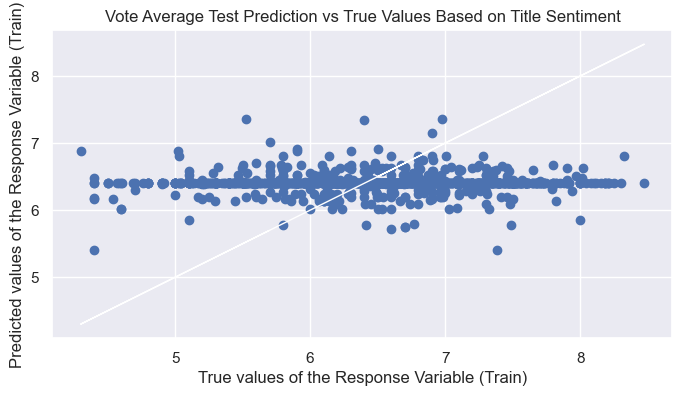

overview_sentiment vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.22798270644234064
Mean Squared Error (MSE) 	: 0.4446028437759373

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.11577279085013648
Mean Squared Error (MSE) 	: 0.6063323337741442



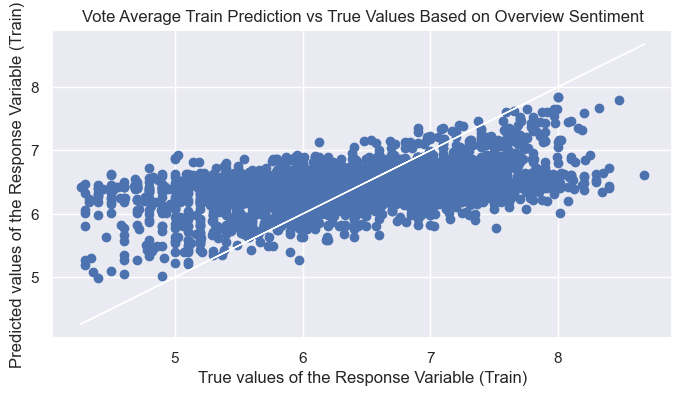

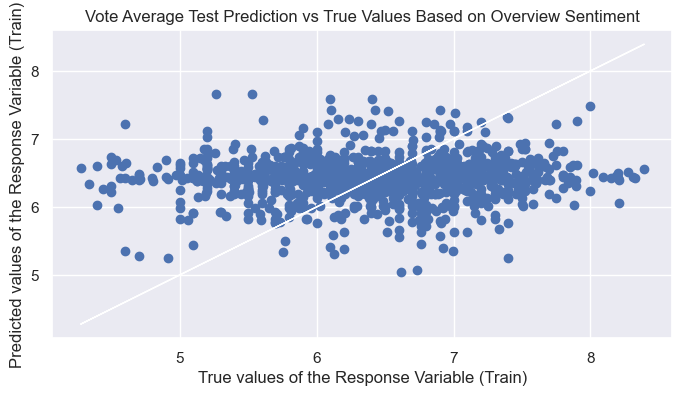

title_length vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.023643180305712108
Mean Squared Error (MSE) 	: 0.5520653962848374

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.008566114265935232
Mean Squared Error (MSE) 	: 0.5790529147764065



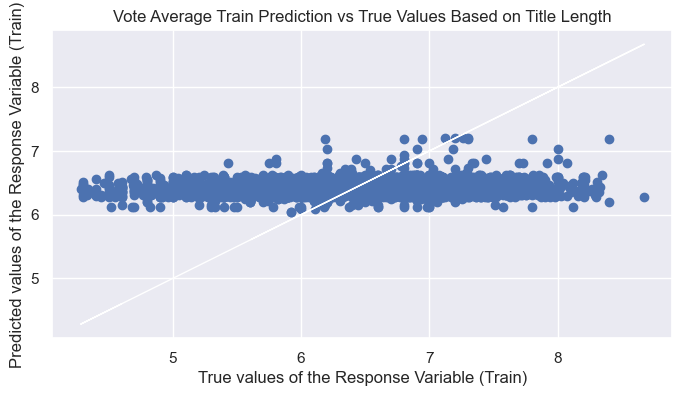

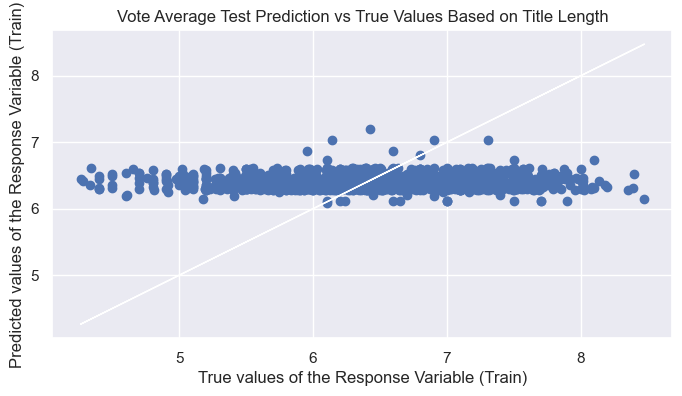

num_words_in_title vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.00939791393048417
Mean Squared Error (MSE) 	: 0.5689505364954845

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.003902601744015355
Mean Squared Error (MSE) 	: 0.5450783588579393



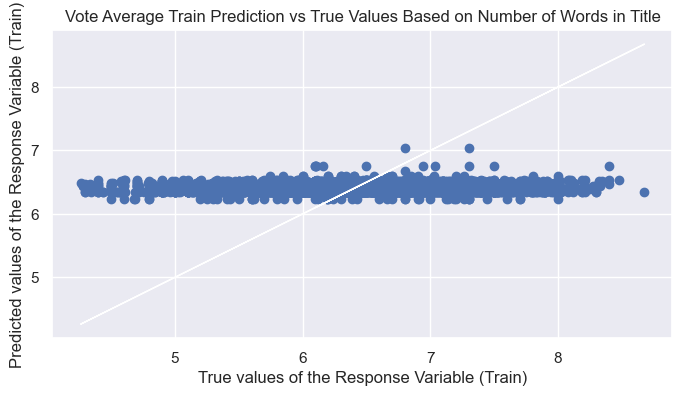

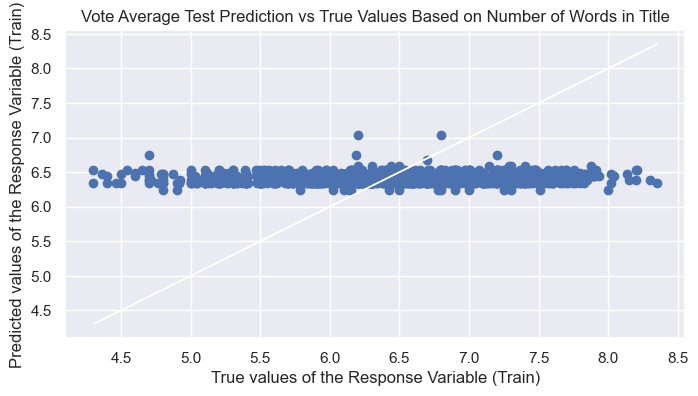

average_title_word_length vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0354751121804332
Mean Squared Error (MSE) 	: 0.5465675391792981

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.023736487832995756
Mean Squared Error (MSE) 	: 0.5846954652939784



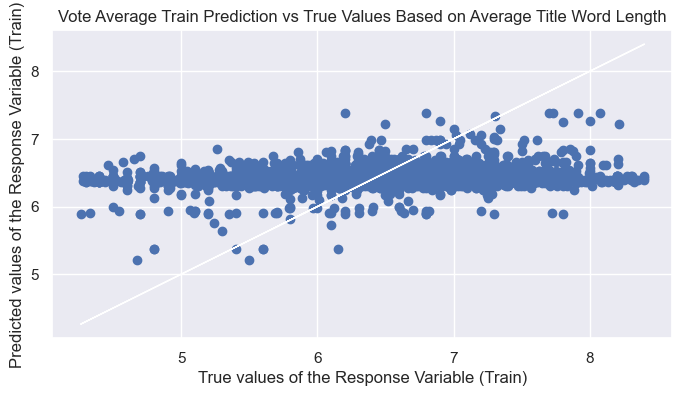

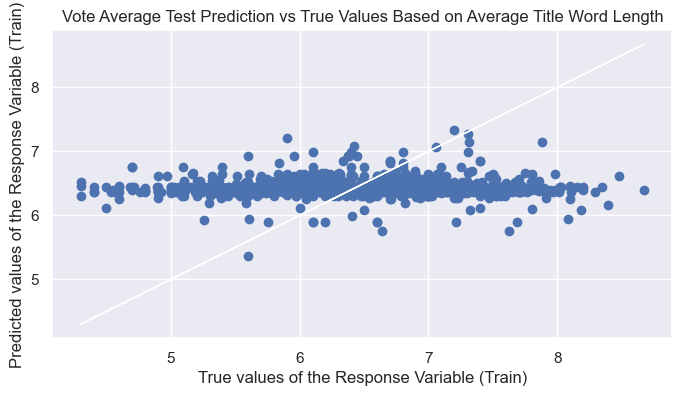

made_up_word_count vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.004000689357711029
Mean Squared Error (MSE) 	: 0.5687616830254638

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0050884931470771555
Mean Squared Error (MSE) 	: 0.5580428018528877



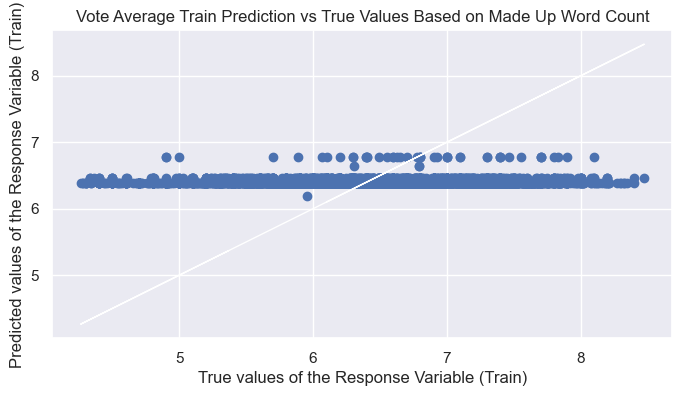

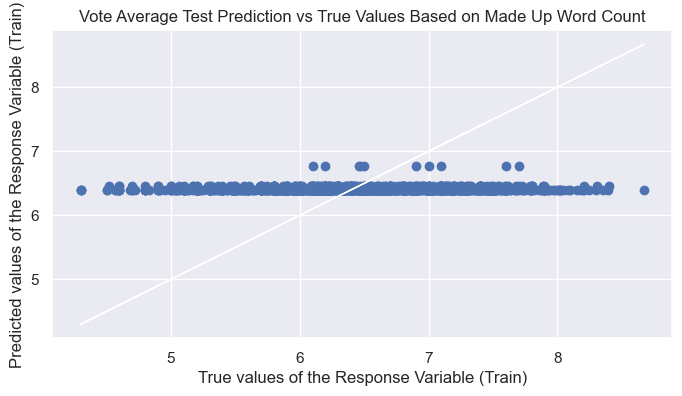

In [6]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "title_sentiment", "vote_average", 200, 0)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Title Sentiment")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Title Sentiment")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "overview_sentiment", "vote_average", 200, 0)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Overview Sentiment")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Overview Sentiment")

title_length_random_forest = generateRandomForestRegressor(data, "title_length", "vote_average", 200, 0)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Title Length")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Title Length")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "num_words_in_title", "vote_average", 200, 0)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Number of Words in Title")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Number of Words in Title")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "average_title_word_length", "vote_average", 200, 0)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Average Title Word Length")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Average Title Word Length")

made_up_word_count_random_forest = generateRandomForestRegressor(data, "made_up_word_count", "vote_average", 200, 0)
generatePredictVsTruePlot(made_up_word_count_random_forest['response_train'], made_up_word_count_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Made Up Word Count")
generatePredictVsTruePlot(made_up_word_count_random_forest['response_test'], made_up_word_count_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Made Up Word Count")

## Multi-Variate Predictor vs. Vote Average

['title_sentiment', 'overview_sentiment', 'title_length', 'num_words_in_title', 'average_title_word_length', 'made_up_word_count'] vs. vote_average
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.798544752565675
Mean Squared Error (MSE) 	: 0.1135487270120613

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0989929391392832
Mean Squared Error (MSE) 	: 0.6376572975330003



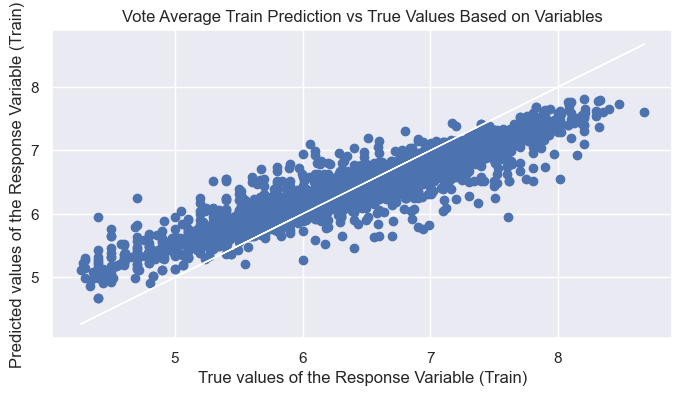

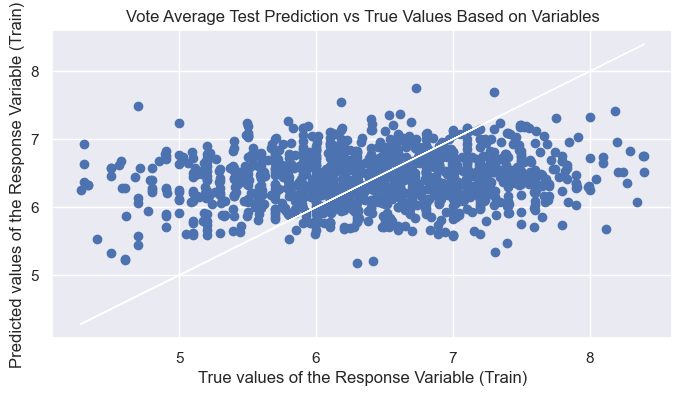

In [7]:
multi_variate_random_forest = generateRandomForestRegressor(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], "vote_average", 200, 0)
generatePredictVsTruePlot(multi_variate_random_forest['response_train'], multi_variate_random_forest['response_train_pred'], "Vote Average Train Prediction vs True Values Based on Variables")
generatePredictVsTruePlot(multi_variate_random_forest['response_test'], multi_variate_random_forest['response_test_pred'], "Vote Average Test Prediction vs True Values Based on Variables")

## Predictor vs. Popularity

title_sentiment vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03447837247911201
Mean Squared Error (MSE) 	: 32.527764620941575

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0349021629600621
Mean Squared Error (MSE) 	: 33.68874451807624



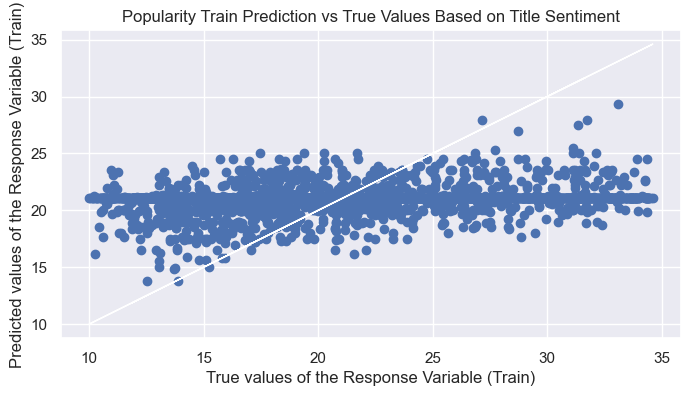

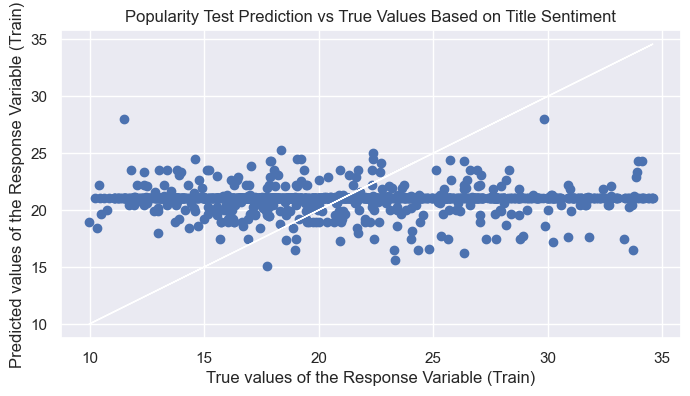

overview_sentiment vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.21388626805389588
Mean Squared Error (MSE) 	: 26.68146916821841

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.15073949278936216
Mean Squared Error (MSE) 	: 36.58275741394725



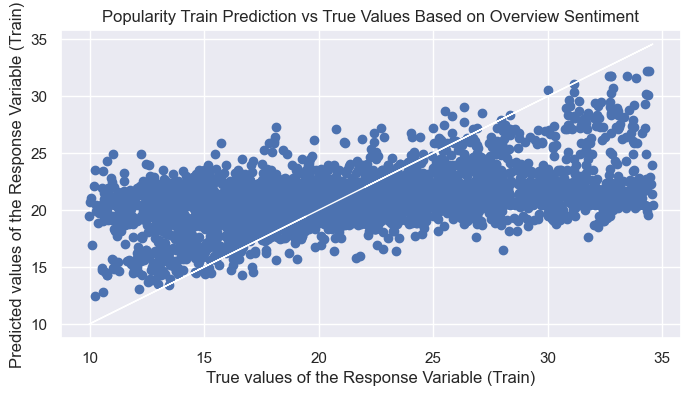

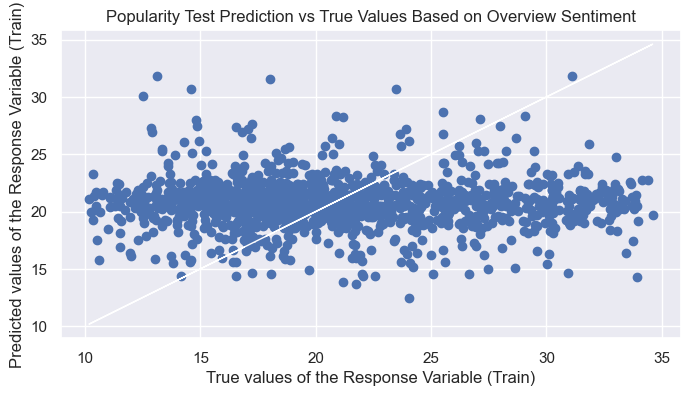

title_length vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.01439197868111286
Mean Squared Error (MSE) 	: 32.74545343613524

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.02270696137211714
Mean Squared Error (MSE) 	: 34.50998609058705



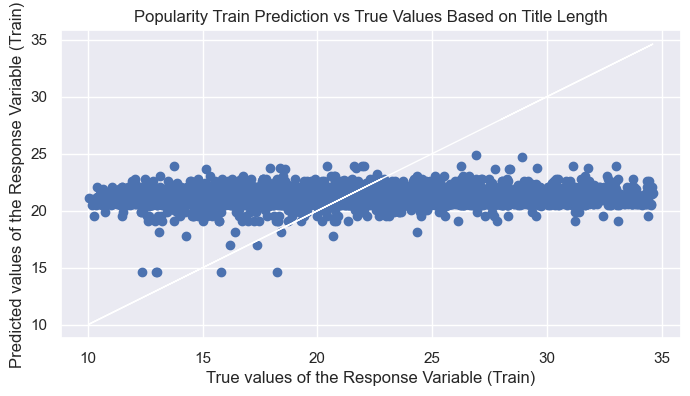

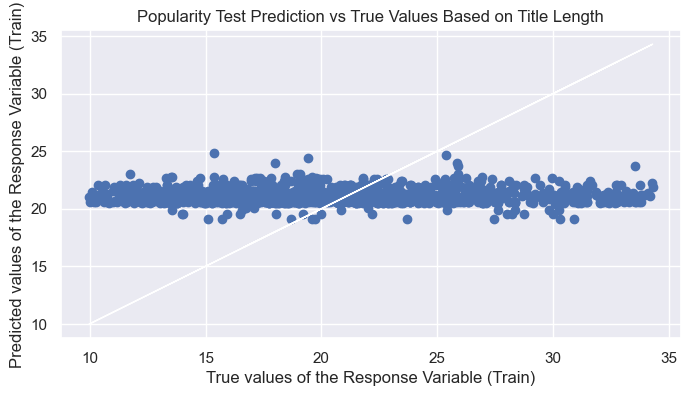

num_words_in_title vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.002732895406722391
Mean Squared Error (MSE) 	: 33.63048690546577

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.0023829876560741425
Mean Squared Error (MSE) 	: 32.52125318857987



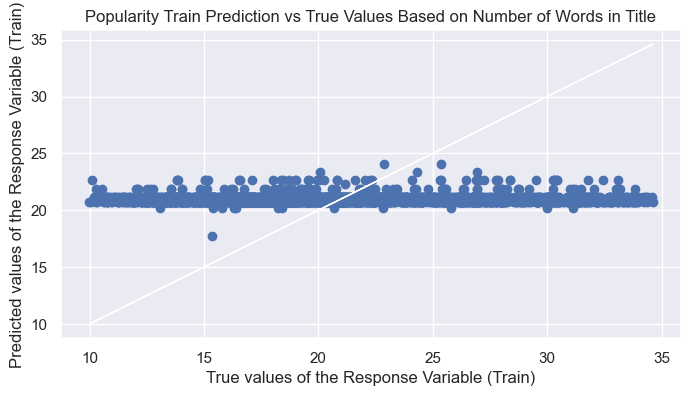

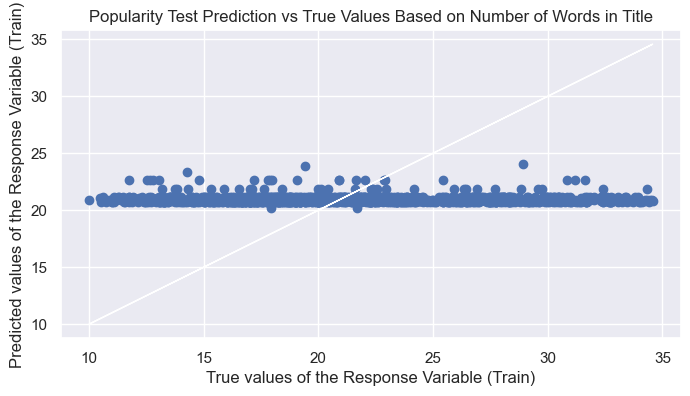

average_title_word_length vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.03009017333491315
Mean Squared Error (MSE) 	: 32.577651371413864

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.037394947820381
Mean Squared Error (MSE) 	: 34.08716455770605



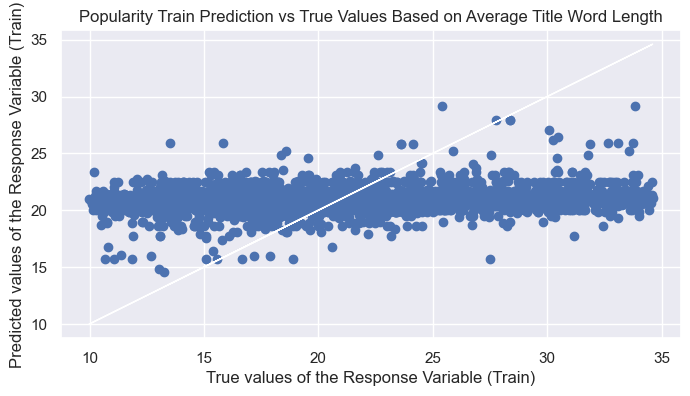

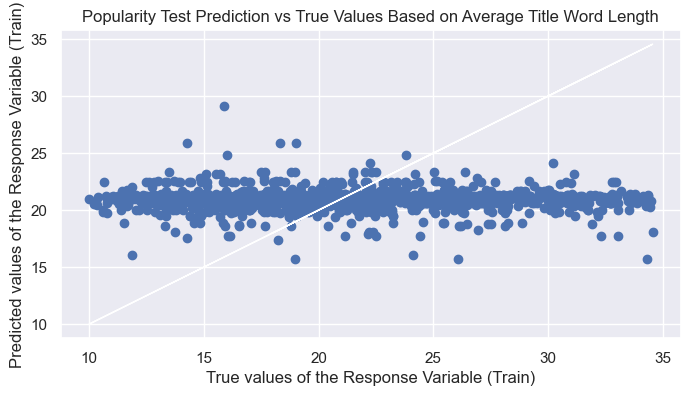

made_up_word_count vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 9.333612071538155e-05
Mean Squared Error (MSE) 	: 33.49164607991993

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.002628829604667926
Mean Squared Error (MSE) 	: 33.138813478240216



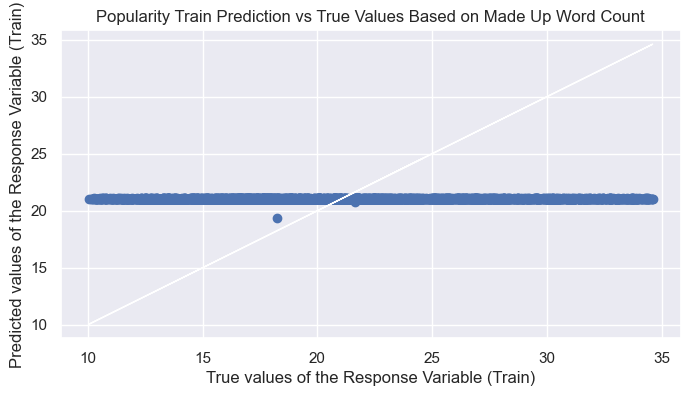

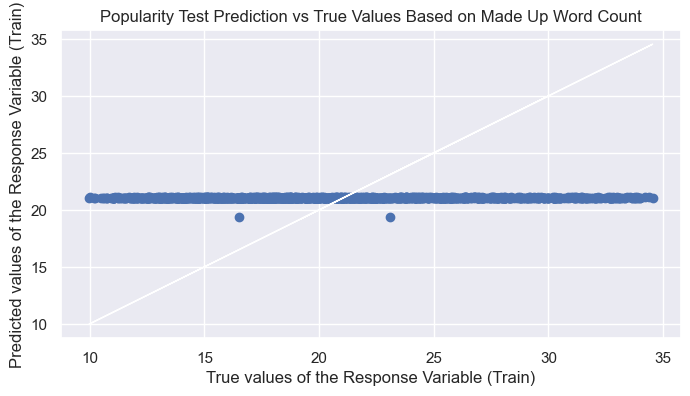

In [8]:
title_sentiment_random_forest = generateRandomForestRegressor(data, "title_sentiment", "popularity", 200, 0)
generatePredictVsTruePlot(title_sentiment_random_forest['response_train'], title_sentiment_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Title Sentiment")
generatePredictVsTruePlot(title_sentiment_random_forest['response_test'], title_sentiment_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Title Sentiment")

overview_sentiment_random_forest = generateRandomForestRegressor(data, "overview_sentiment", "popularity", 200, 0)
generatePredictVsTruePlot(overview_sentiment_random_forest['response_train'], overview_sentiment_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Overview Sentiment")
generatePredictVsTruePlot(overview_sentiment_random_forest['response_test'], overview_sentiment_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Overview Sentiment")

title_length_random_forest = generateRandomForestRegressor(data, "title_length", "popularity", 200, 0)
generatePredictVsTruePlot(title_length_random_forest['response_train'], title_length_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Title Length")
generatePredictVsTruePlot(title_length_random_forest['response_test'], title_length_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Title Length")

num_words_in_title_random_forest = generateRandomForestRegressor(data, "num_words_in_title", "popularity", 200, 0)
generatePredictVsTruePlot(num_words_in_title_random_forest['response_train'], num_words_in_title_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Number of Words in Title")
generatePredictVsTruePlot(num_words_in_title_random_forest['response_test'], num_words_in_title_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Number of Words in Title")

average_title_word_length_random_forest = generateRandomForestRegressor(data, "average_title_word_length", "popularity", 200, 0)
generatePredictVsTruePlot(average_title_word_length_random_forest['response_train'], average_title_word_length_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Average Title Word Length")
generatePredictVsTruePlot(average_title_word_length_random_forest['response_test'], average_title_word_length_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Average Title Word Length")

made_up_word_count_random_forest = generateRandomForestRegressor(data, "made_up_word_count", "popularity", 200, 0)
generatePredictVsTruePlot(made_up_word_count_random_forest['response_train'], made_up_word_count_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Made Up Word Count")
generatePredictVsTruePlot(made_up_word_count_random_forest['response_test'], made_up_word_count_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Made Up Word Count")

## Multi-Variate Predictor vs. Popularity

['title_sentiment', 'overview_sentiment', 'title_length', 'num_words_in_title', 'average_title_word_length', 'made_up_word_count'] vs. popularity
Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7875000050095915
Mean Squared Error (MSE) 	: 7.004543277534921

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.15372788939400706
Mean Squared Error (MSE) 	: 40.0154188100078



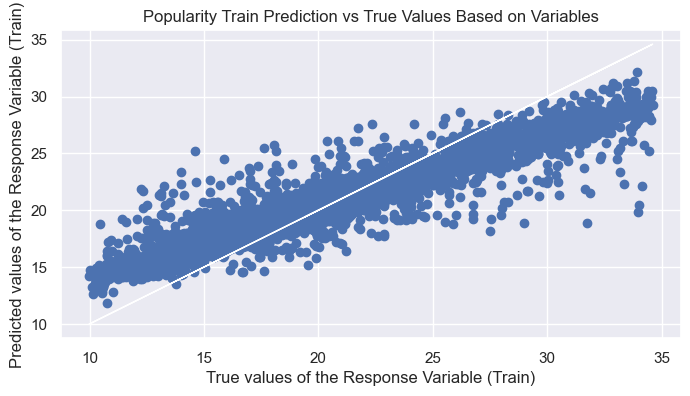

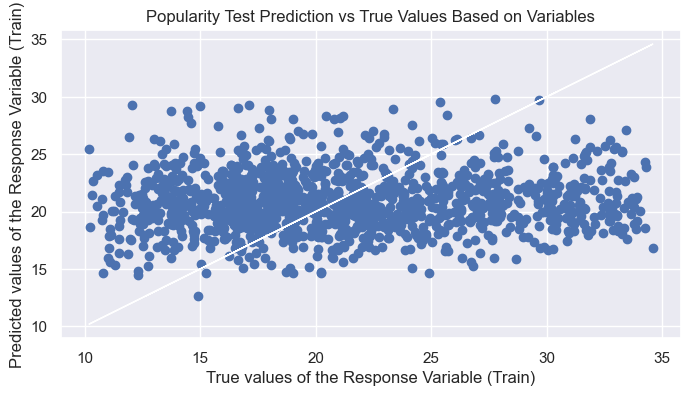

In [9]:
multi_variate_random_forest = generateRandomForestRegressor(data, ['title_sentiment','overview_sentiment','title_length','num_words_in_title','average_title_word_length','made_up_word_count'], "popularity", 200, 0)
generatePredictVsTruePlot(multi_variate_random_forest['response_train'], multi_variate_random_forest['response_train_pred'], "Popularity Train Prediction vs True Values Based on Variables")
generatePredictVsTruePlot(multi_variate_random_forest['response_test'], multi_variate_random_forest['response_test_pred'], "Popularity Test Prediction vs True Values Based on Variables")

# Classification Tree

## Vote Average

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8824439288476411
Test Classification Accuracy 	: 0.8739365815931941
Train Confusion Matrix
True Positive Rate: 0.31768388106416273
False Positive Rate: 0.006172839506172839
True Negative Rate: 0.9938271604938271
False Negative Rate: 0.6823161189358372
Test Confusion Matrix
True Positive Rate: 0.2688679245283019
False Positive Rate: 0.0074005550416281225
True Negative Rate: 0.9925994449583718
False Negative Rate: 0.7311320754716981


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 58.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


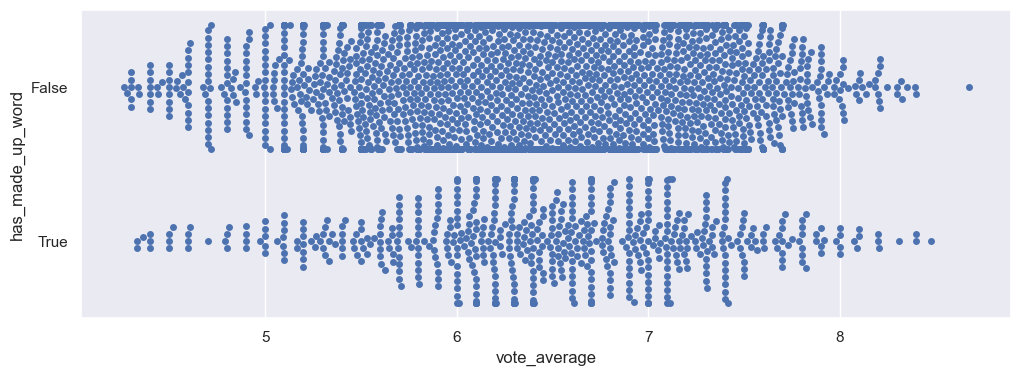

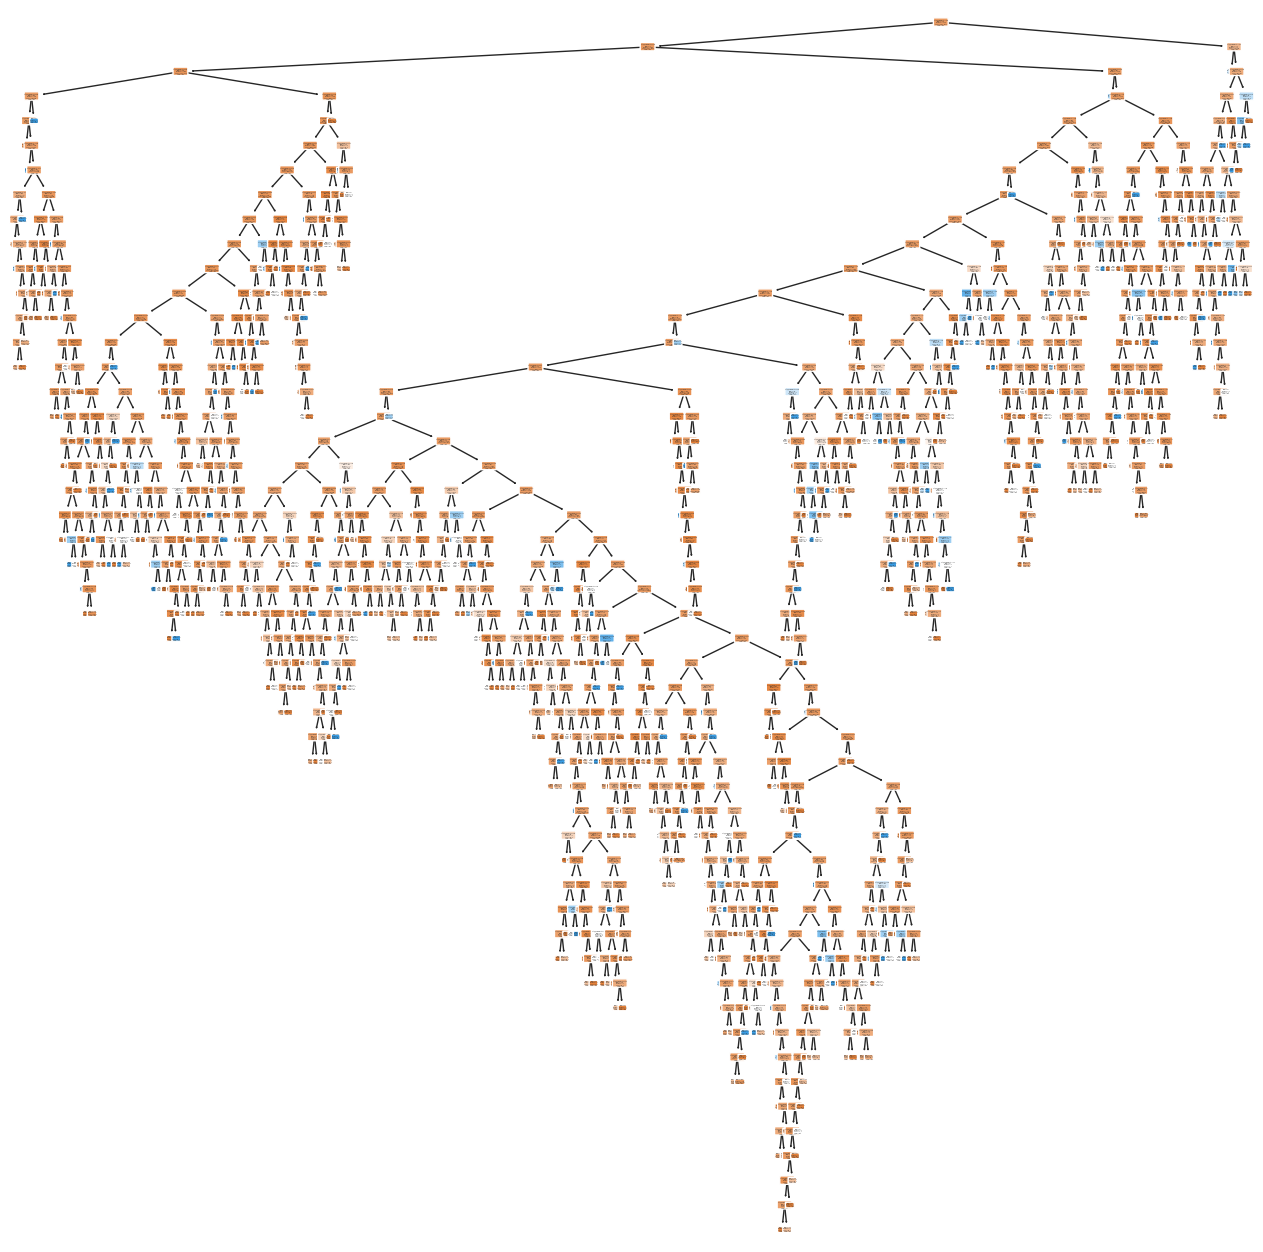

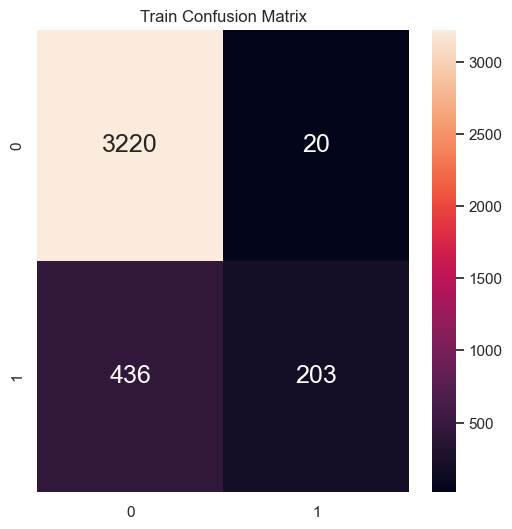

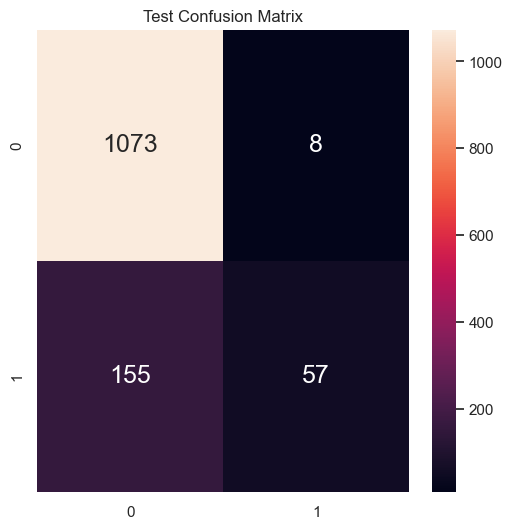

In [10]:
has_made_up_word_class_tree = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

## Popularity

popularity vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.9680329981954112
Test Classification Accuracy 	: 0.9783449342614076
Train Confusion Matrix
True Positive Rate: 0.8174962292609351
False Positive Rate: 0.0009328358208955224
True Negative Rate: 0.9990671641791045
False Negative Rate: 0.18250377073906485
Test Confusion Matrix
True Positive Rate: 0.851063829787234
False Positive Rate: 0.0
True Negative Rate: 1.0
False Negative Rate: 0.14893617021276595


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


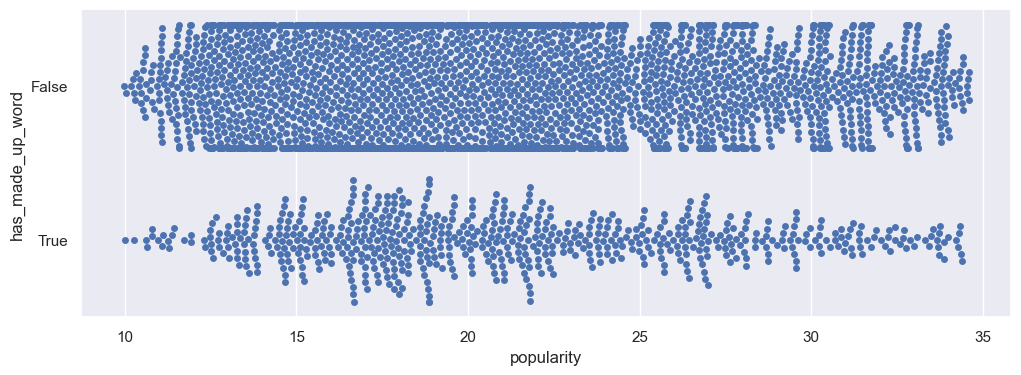

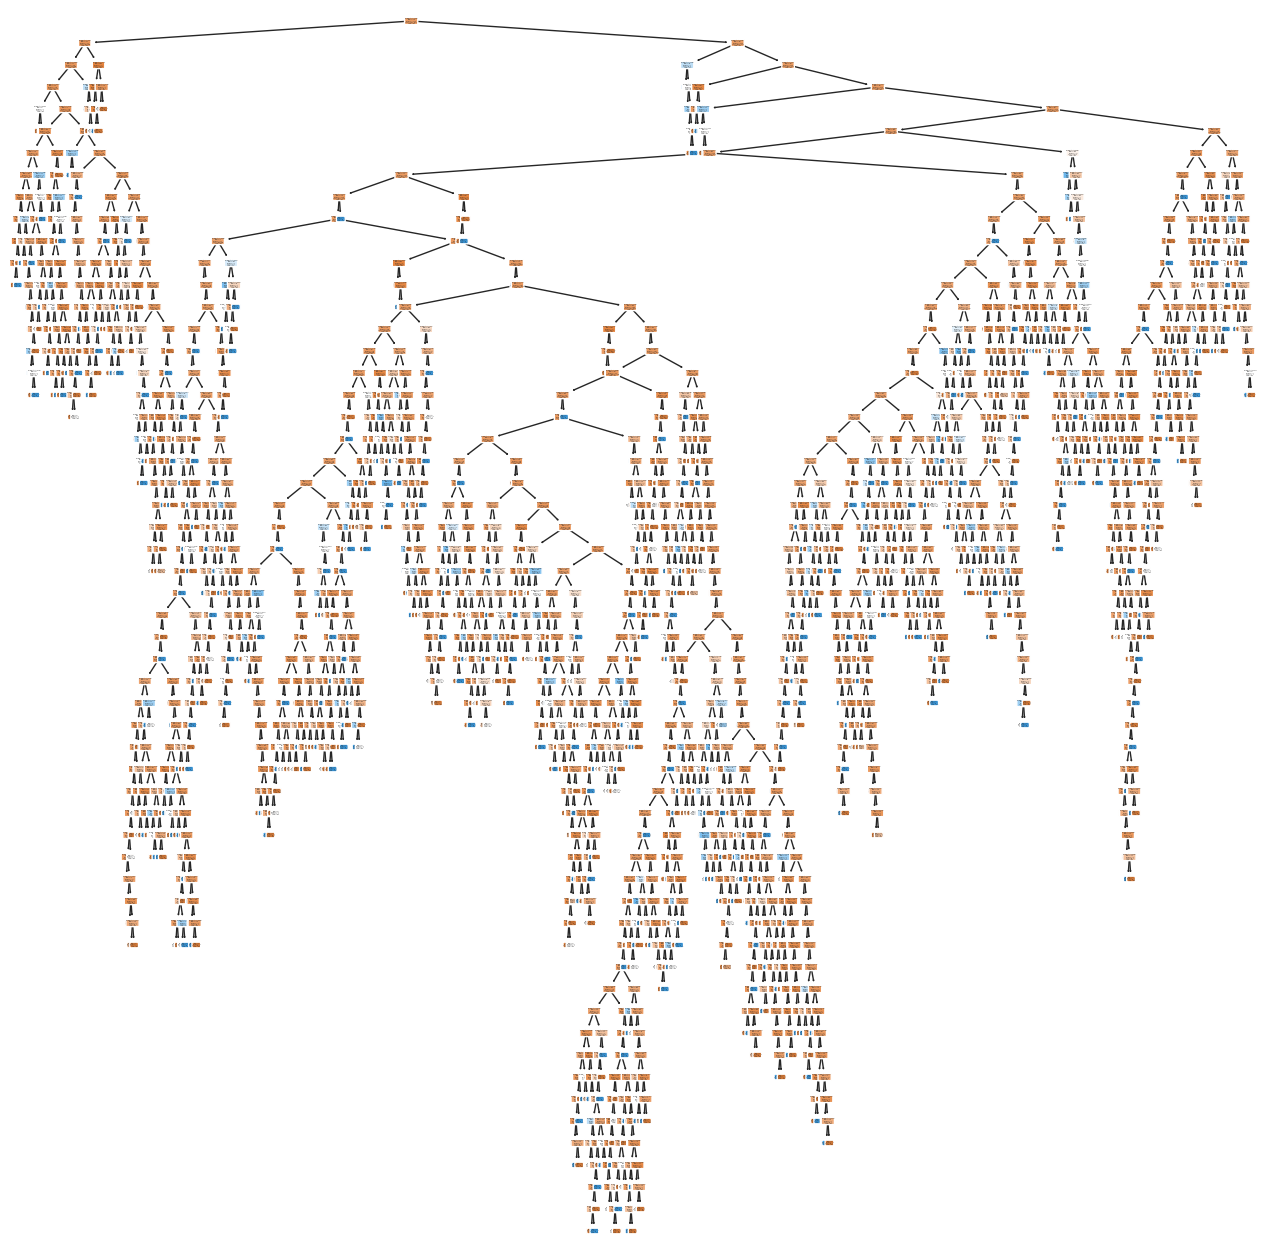

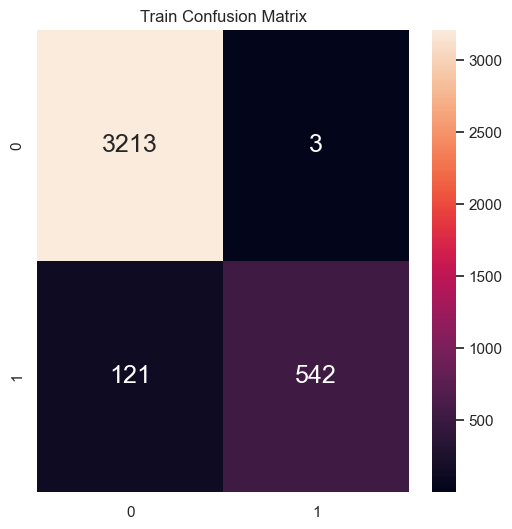

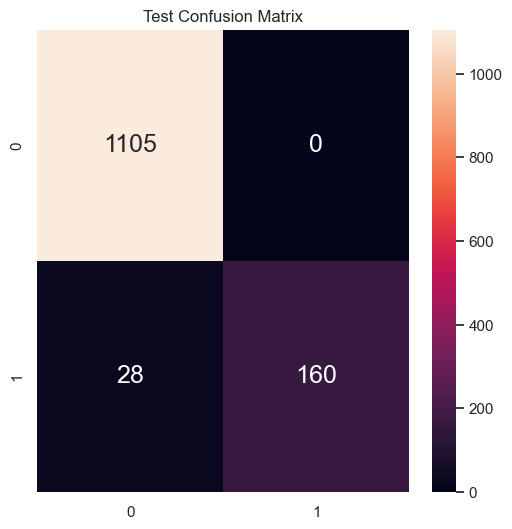

In [11]:
has_made_up_word_class_tree = generateClassificationTree(data,"popularity",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_class_tree['response_train'], has_made_up_word_class_tree['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_class_tree['response_test'], has_made_up_word_class_tree['response_test_pred'], "Test Confusion Matrix")

# Random Forest Classifier

## Vote Average

vote_average vs. has_made_up_word with depth 80
Train Classification Accuracy 	: 0.8868265016756897
Test Classification Accuracy 	: 0.794276875483372
Train Confusion Matrix
True Positive Rate: 0.3524720893141946
False Positive Rate: 0.01014760147601476
True Negative Rate: 0.9898523985239852
False Negative Rate: 0.6475279106858054
Test Confusion Matrix
True Positive Rate: 0.14285714285714285
False Positive Rate: 0.06922357343311505
True Negative Rate: 0.930776426566885
False Negative Rate: 0.8571428571428571


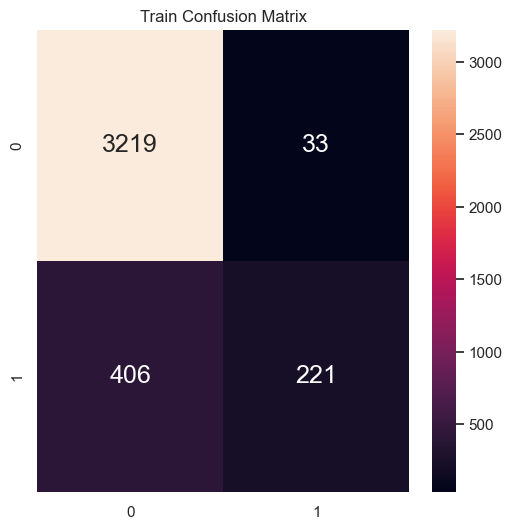

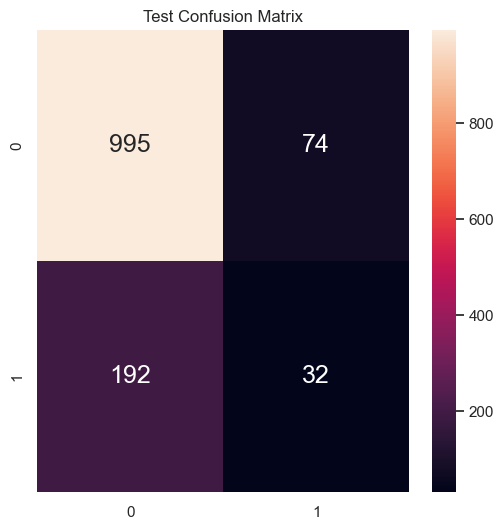

In [12]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "vote_average", "has_made_up_word", 150, 80)
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")

## Popularity

popularity vs. has_made_up_word with depth 50
Train Classification Accuracy 	: 0.9757669502449084
Test Classification Accuracy 	: 0.7447795823665894
Train Confusion Matrix
True Positive Rate: 0.879746835443038
False Positive Rate: 0.00554357868801971
True Negative Rate: 0.9944564213119803
False Negative Rate: 0.12025316455696203
Test Confusion Matrix
True Positive Rate: 0.2237442922374429
False Positive Rate: 0.148975791433892
True Negative Rate: 0.851024208566108
False Negative Rate: 0.776255707762557


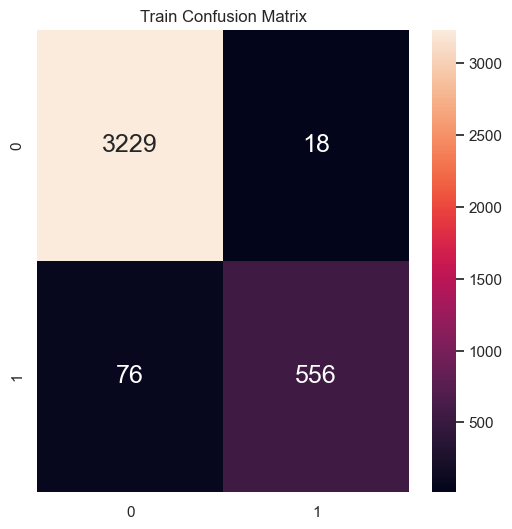

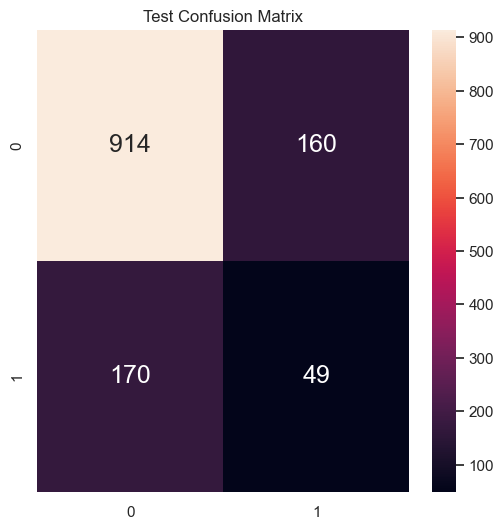

In [41]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "popularity", "has_made_up_word", 120, 50)
generateConfusionMatrix(has_made_up_word_random_forest['response_train'], has_made_up_word_random_forest['response_train_pred'], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest['response_test'], has_made_up_word_random_forest['response_test_pred'], "Test Confusion Matrix")